This code is an introduction to supervised learning solving a classification problem using **decision trees**.
It follows [this tutorial](https://youtu.be/7eh4d6sabA0). 

# **Classification Problem**
We will follow these steps of solving a machine learning problem.


1. Import the Data
2. Clean the Data
3. split the Data into Training/ Test steps
4. Create a Model
5. Train the Model
6. Make Predictions
7. Evaluate and improve


In [1]:
import pandas as pd
data = pd.read_csv('miami-housing.csv')

In [2]:
data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
data.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [6]:
data.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [3]:
pd.isnull(data).sum() > 0

LATITUDE             False
LONGITUDE            False
PARCELNO             False
SALE_PRC             False
LND_SQFOOT           False
TOT_LVG_AREA         False
SPEC_FEAT_VAL        False
RAIL_DIST            False
OCEAN_DIST           False
WATER_DIST           False
CNTR_DIST            False
SUBCNTR_DI           False
HWY_DIST             False
age                  False
avno60plus           False
month_sold           False
structure_quality    False
dtype: bool

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
sns.set_theme(style='whitegrid')

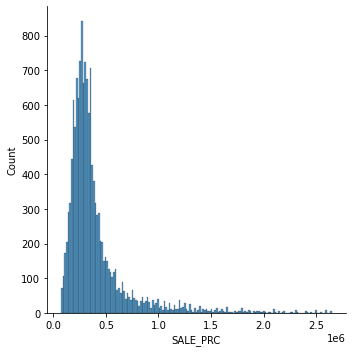

In [84]:
sns.displot(data['SALE_PRC'])

<AxesSubplot:>

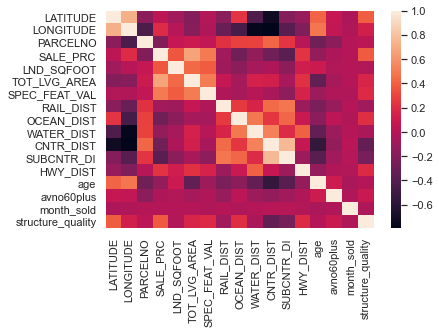

In [13]:
sns.heatmap(data.corr())

In [49]:
y = data.SALE_PRC
features = ['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality']
X = data[features]

In [50]:
X.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [51]:
X.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [78]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 10)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)

In [80]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [81]:
predictions = model.predict(X_test)

In [82]:
predictions

array([ 260000.,  520000.,  390000., ...,  158000., 1365000.,  345000.])

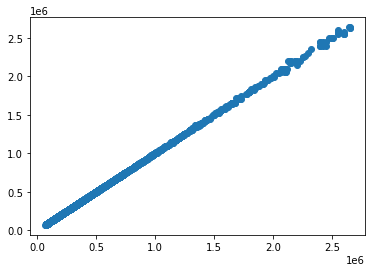

In [71]:
plt.scatter(y_test, predictions)

C:\Users\proje\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE_PRC', ylabel='Density'>

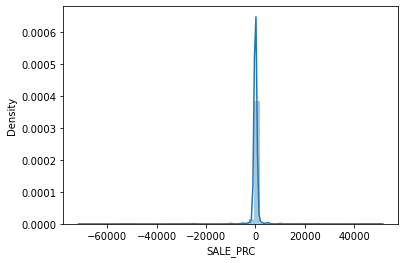

In [72]:
sns.distplot((y_test-predictions), bins=50)

In [83]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.8112259546368074

In [41]:
print(data.dtypes)

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object


In [60]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

Other Models

In [61]:
# OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

C:\Users\proje\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22965e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [62]:
from sklearn.metrics import explained_variance_score as evs

In [63]:
print('Explained Variance Score:')
print('EVS - OLS: {}'.format(evs(y_test, ols_yhat)))
print('EVS - Ridge: {}'.format(evs(y_test, ridge_yhat)))
print('EVS - Lasso: {}'.format(evs(y_test, lasso_yhat)))
print('EVS - Bayesion: {}'. format(evs(y_test, bayesian_yhat)))
print('EVS - ElasticNet: {}'. format(evs(y_test, en_yhat)))

Explained Variance Score:
EVS - OLS: 1.0
EVS - Ridge: 1.0
EVS - Lasso: 0.9999999999999747
EVS - Bayesion: 0.9999919432801642
EVS - ElasticNet: 0.9999999999999565


In [64]:
from sklearn.metrics import r2_score as r2

In [65]:
# R-squared
print('R-SQUARED:')
print('R-squared of OLS: {}'.format(r2(y_test, ols_yhat)))
print('R-squared of Ridge: {}'.format(r2(y_test, ridge_yhat)))
print('R-squared of Lasso: {}'.format(r2(y_test, lasso_yhat)))
print('R-squared of Bayesion: {}'.format(r2(y_test, bayesian_yhat)))
print('R-squared of ElasticNet: {}'.format(r2(y_test, en_yhat)))

R-SQUARED:
R-squared of OLS: 1.0
R-squared of Ridge: 1.0
R-squared of Lasso: 0.9999999999999747
R-squared of Bayesion: 0.9999919423834869
R-squared of ElasticNet: 0.9999999999999565
